In [1]:
import json
from collections import defaultdict
import os
import sys

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
mpl.rc('text', usetex=False)

In [7]:
%config InlineBackend.figure_format = 'retina'
mpl.rc('font', **{'size': 24, 'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)

In [8]:
mpl.rcParams.update({'font.size': 22})

In [10]:
datapath = os.path.join(os.path.dirname(os.getcwd()), "analysis")
datapath

'/Users/tollef/Downloads/git/PHD/Norwegian-Coreference-Corpus/code/analysis'

# Visualization of coref data
- Document length (avg, max, min)
- Coref links

In [11]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

In [12]:
def path(f):
    return os.path.join(datapath, "{}.jsonl".format(f))

<AxesSubplot:>

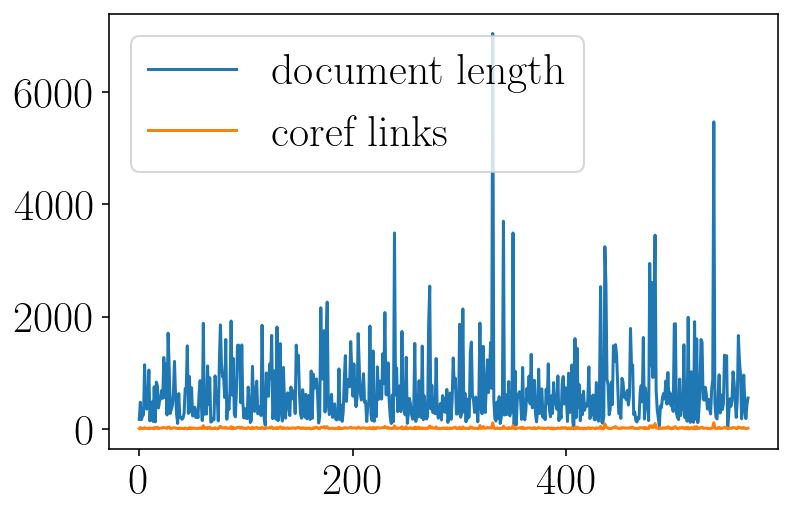

In [30]:
def make_df_row(data):
    return [len(data["tokens"]), len(data["clusters"])]

jsonline_path = "../../annotations_jsonlines"
jsonline_files = os.listdir(jsonline_path)

data = []
for jfile in jsonline_files:
    _path = os.path.join(jsonline_path, jfile)
    if ".jsonl" not in _path:
        continue
    with open(_path, "r", encoding="utf-8") as f:
        as_json = json.loads(f.read())
        data.append(make_df_row(as_json))

df = pd.DataFrame(data, columns=["document length", "coref links"])
df.plot()

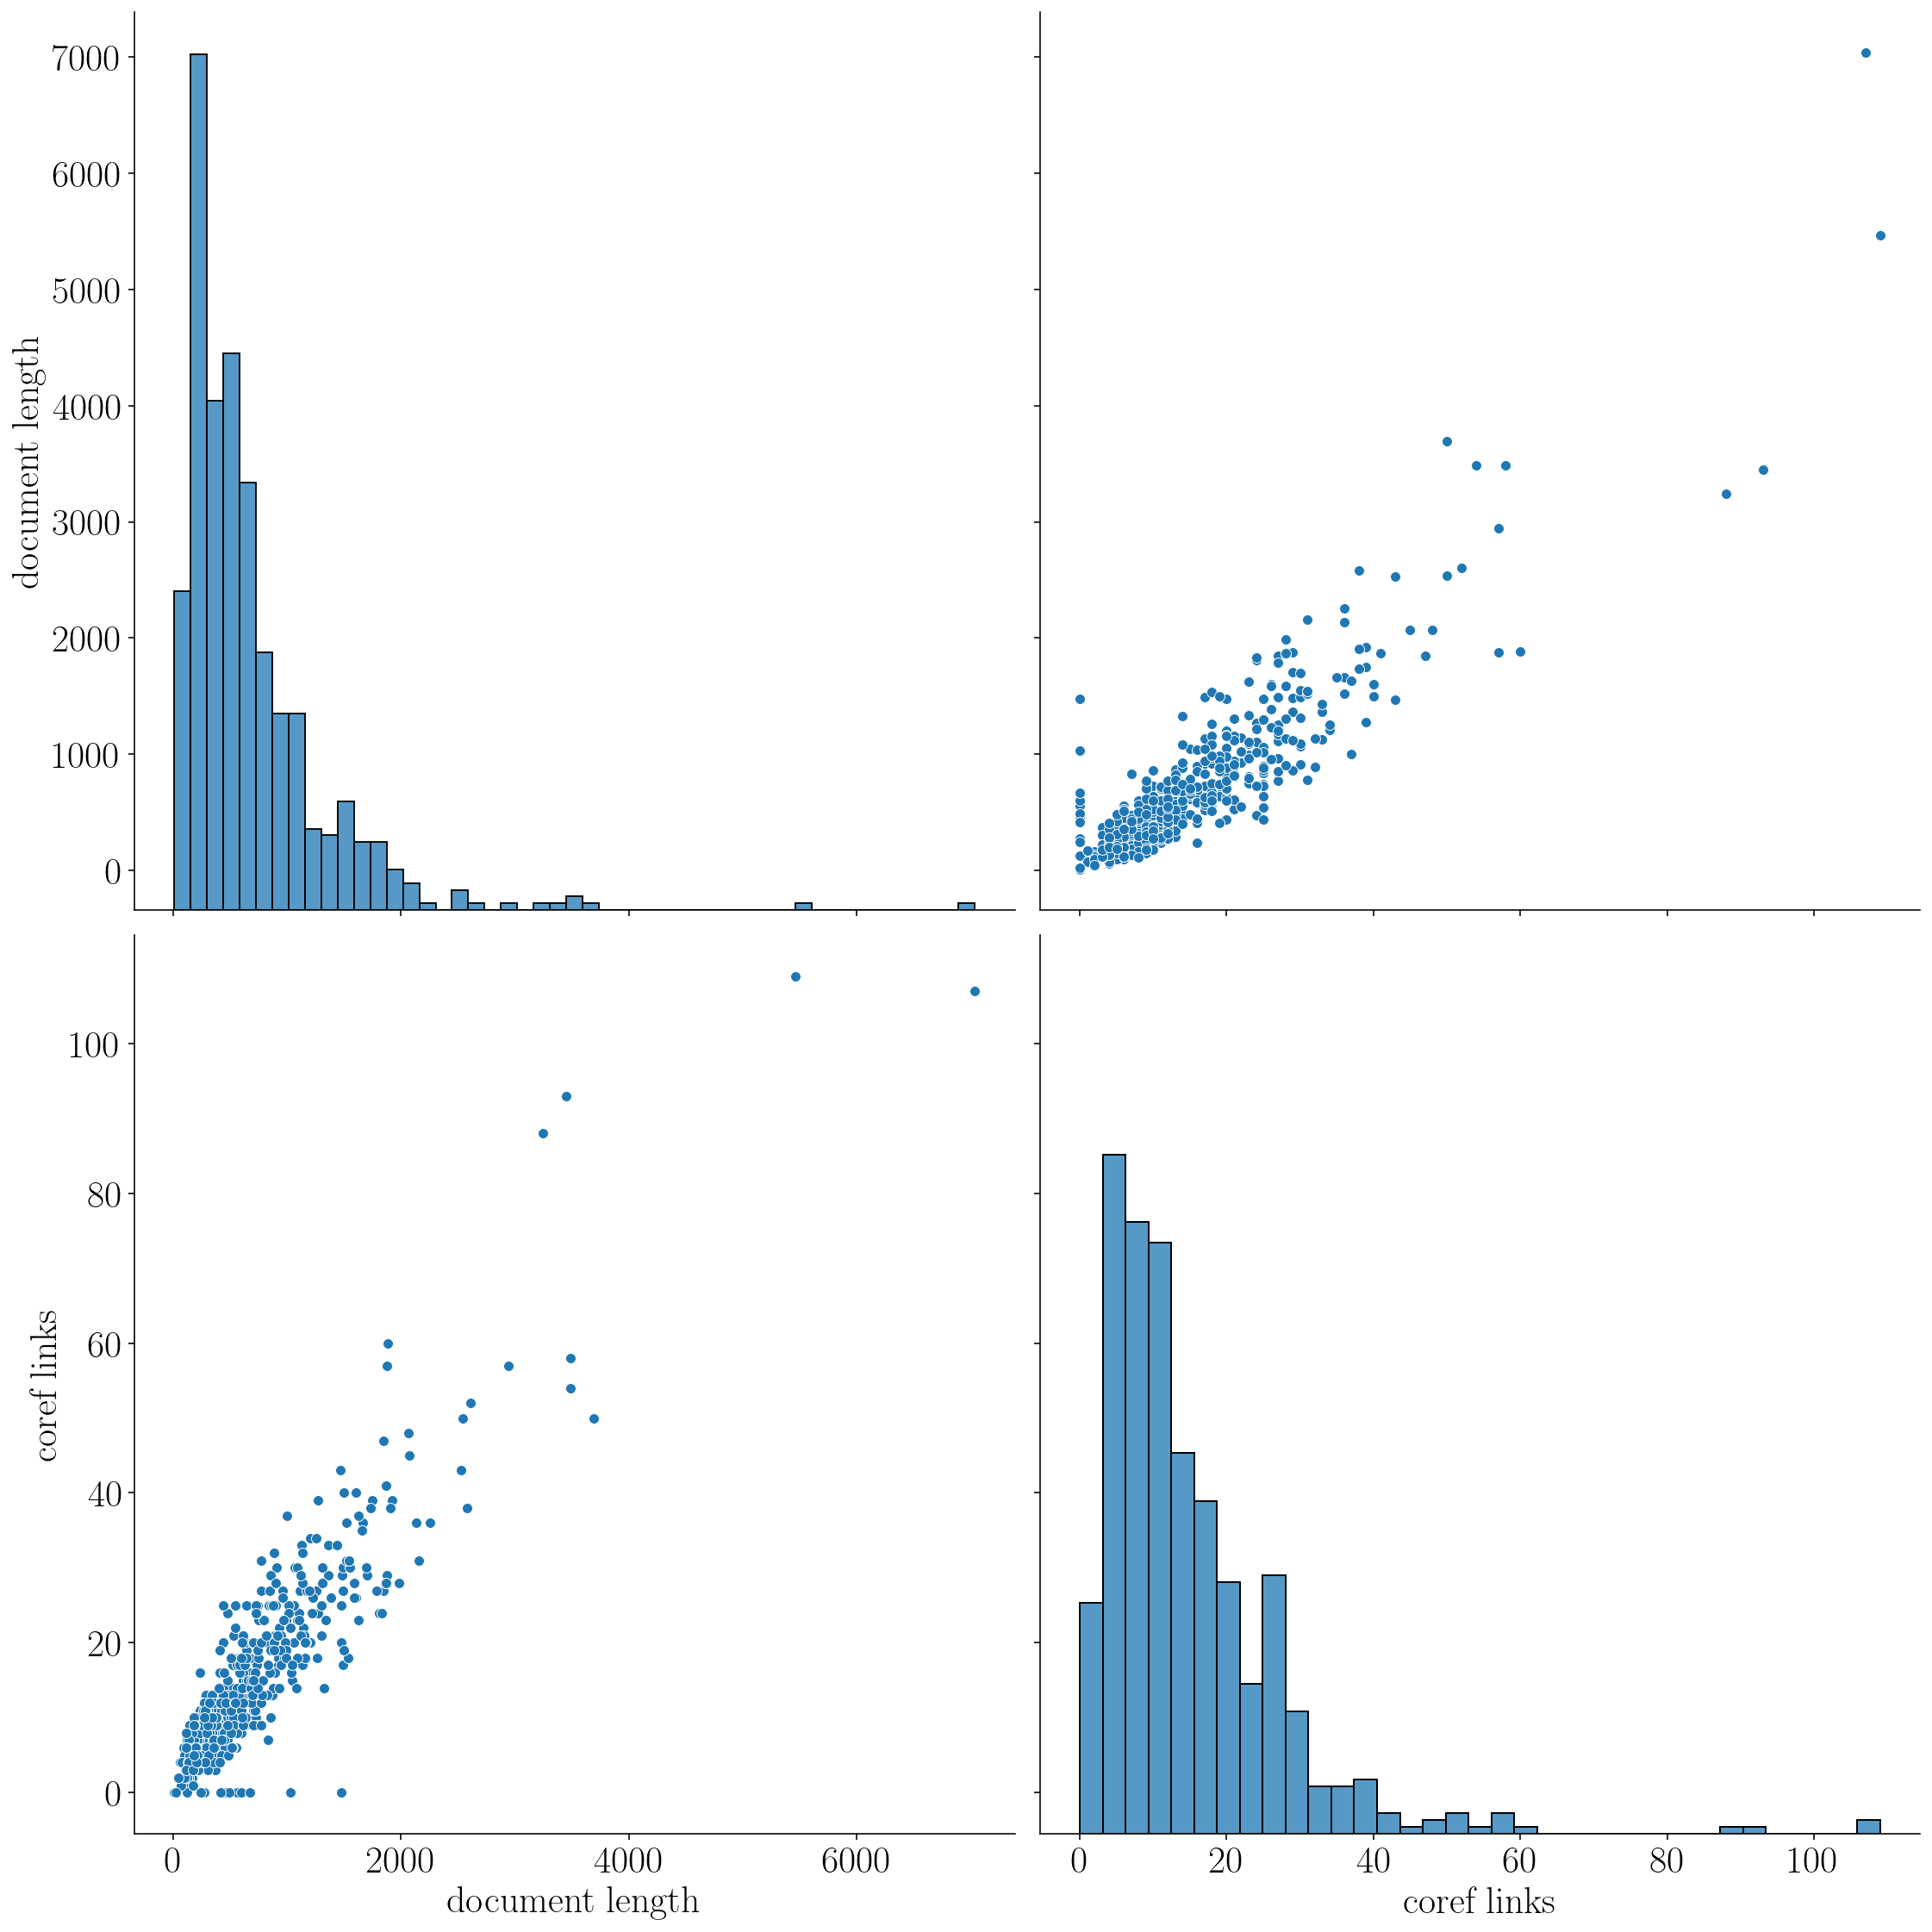

In [32]:
sns.pairplot(data=df, height=8)

In [33]:
sns.set(style="ticks", color_codes=True)
sns.set_color_codes()

Text(0.5, 0.98, 'All data')

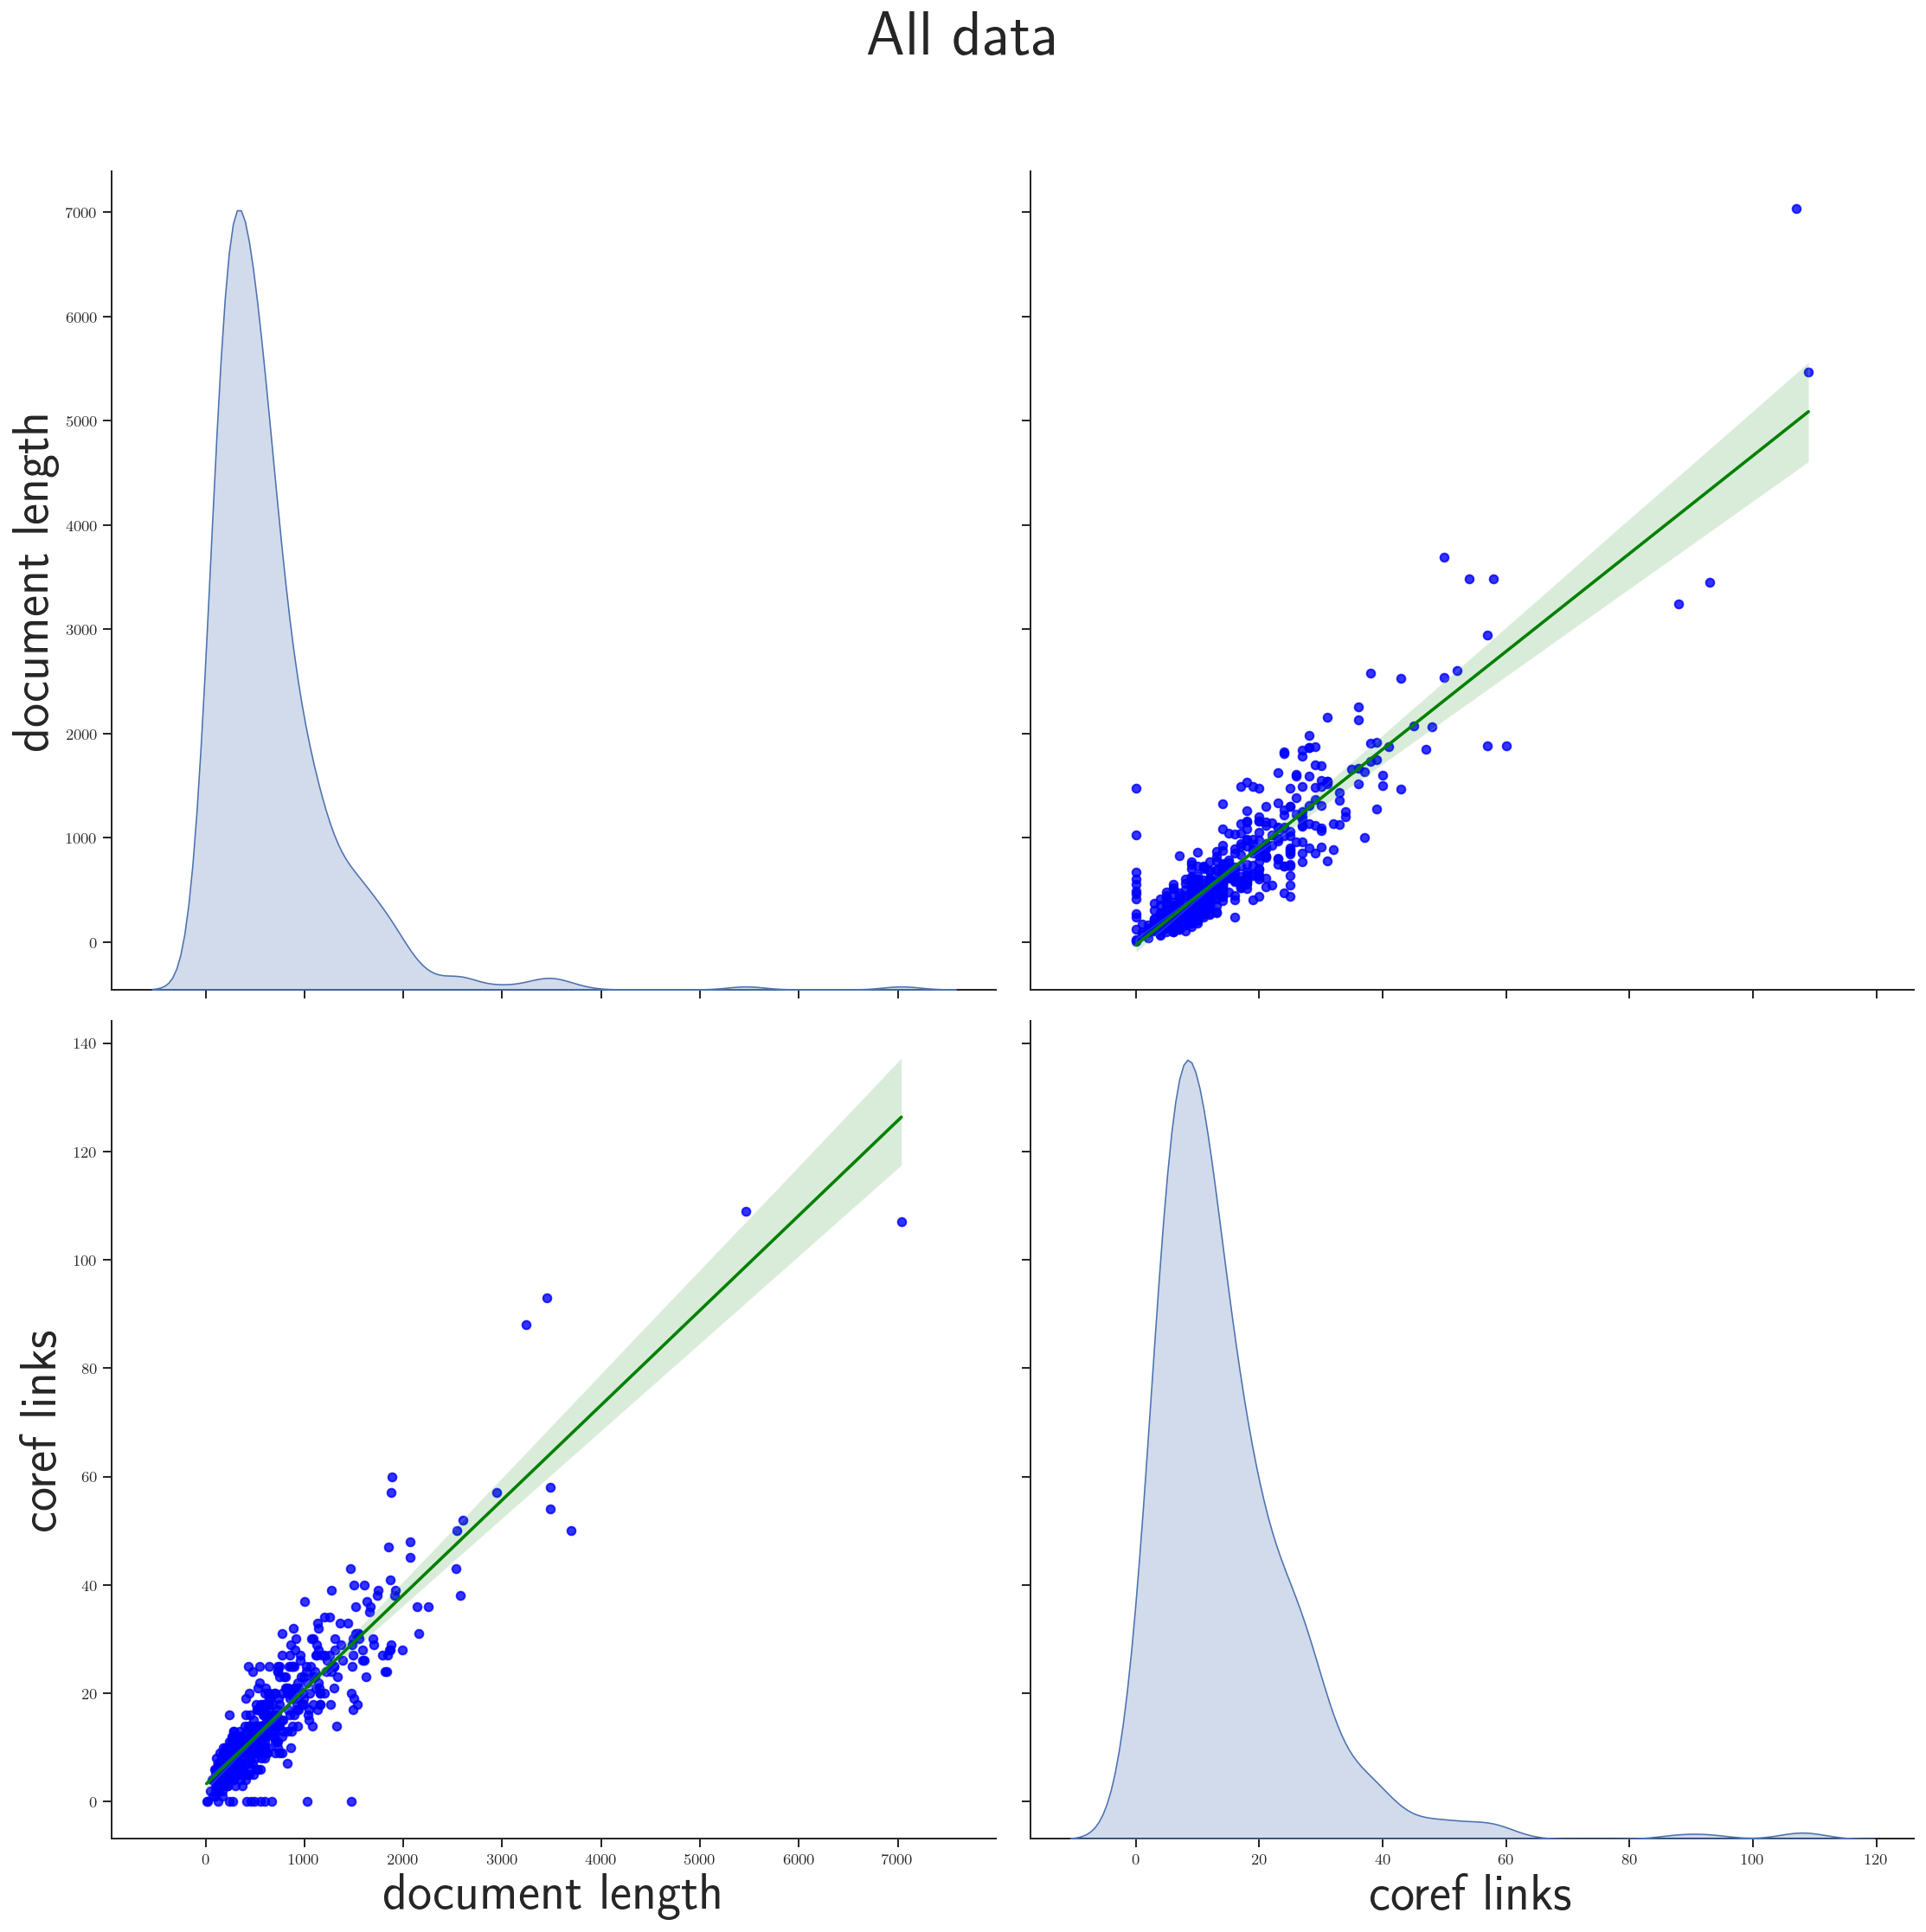

In [34]:
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":30,"axes.labelsize":30})
kws = {
    'line_kws': { 'color': 'green'},
    'scatter_kws': {'color': 'blue'},
}
b = sns.pairplot(data=df, height=8, kind="reg", diag_kind="kde", plot_kws=kws)
plt.subplots_adjust(top=0.9)
b.fig.suptitle('All data') # can also get the figure from plt.gcf()

In [35]:
def get_df_stats(df, folder):
    """
    interesting data points:
    - dataset
    - number of coreference clusters
    - average document length
    - min doc len
    - max doc len
    """
    doclen = np.array(df["document length"])
    corefs = np.array(df["coref links"])
    try:
        _avg = round(doclen.mean(), 2)
        _min = round(doclen.min(), 2)
        _max = round(doclen.max(), 2)
        num_coref_clusters = round(corefs.mean(), 2)
        ndocs = len(doclen)
        tot_clusters = corefs.sum()
    
        return [folder, ndocs, _avg, _min, _max, num_coref_clusters, tot_clusters]
    except:
        print(doclen)
        print(corefs)

In [37]:
# four similarly sized dataset:
kws = {
    'line_kws': { 'color': 'green'},
    'scatter_kws': {'color': 'blue'},
}
datasets = ["gum", "ontonotes_dev", "litbank", "preco_dev"]
cols = ["document length", "coref links"]

stats = []
alldata = []
for ds in datasets:
    tmp = path(ds)
    alldata.extend(data)
    plot = False
    if plot:
        tmp_df = pd.DataFrame(data, columns=cols)
        fit = sns.pairplot(data=tmp_df, height=8, kind="reg", diag_kind="kde", plot_kws=kws)
        plt.subplots_adjust(top=0.9)
        fit.fig.suptitle("dataset: " + ds.replace("_", "-")) # can also get the figure from plt.gcf()
        fit.savefig("{}.png".format(ds), dpi=200)
    else:
        tmp_df = pd.DataFrame(data, columns=cols)
        stats.append(get_df_stats(tmp_df, ds))        


In [39]:
aa = pd.DataFrame(stats, columns=["dataset", "docs", "avg doclen", "minlen", "maxlen", "avg coref links", "total links"])

In [40]:
aa.describe()

,docs,avg doclen,minlen,maxlen,avg coref links,total links
count,4.0,4.0,4.0,4.0,4.00,4.0
mean,571.0,673.8,10.0,7037.0,14.94,8532.0
std,0.0,0.0,0.0,0.0,0.00,0.0
min,571.0,673.8,10.0,7037.0,14.94,8532.0
25%,571.0,673.8,10.0,7037.0,14.94,8532.0
50%,571.0,673.8,10.0,7037.0,14.94,8532.0
75%,571.0,673.8,10.0,7037.0,14.94,8532.0
max,571.0,673.8,10.0,7037.0,14.94,8532.0


In [41]:
tmp_df = pd.DataFrame(alldata, columns=cols)
tmp_df

,document length,coref links
0,169,6
1,475,24
2,164,8
3,224,8
4,251,7
...,...,...
2279,958,26
2280,481,9
2281,183,5
2282,425,7


In [42]:
tmp_df["ratio"] = np.nan
def add_ratio(row):
    if row["coref links"] > 0:
        row["ratio"] = row["document length"] / row["coref links"]
    return row
tmp_df = tmp_df.apply(lambda row: add_ratio(row), axis=1)
tmp_df

,document length,coref links,ratio
0,169.0,6.0,28.166667
1,475.0,24.0,19.791667
2,164.0,8.0,20.500000
3,224.0,8.0,28.000000
4,251.0,7.0,35.857143
...,...,...,...
2279,958.0,26.0,36.846154
2280,481.0,9.0,53.444444
2281,183.0,5.0,36.600000
2282,425.0,7.0,60.714286


/Users/tollef/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ratio', ylabel='Density'>

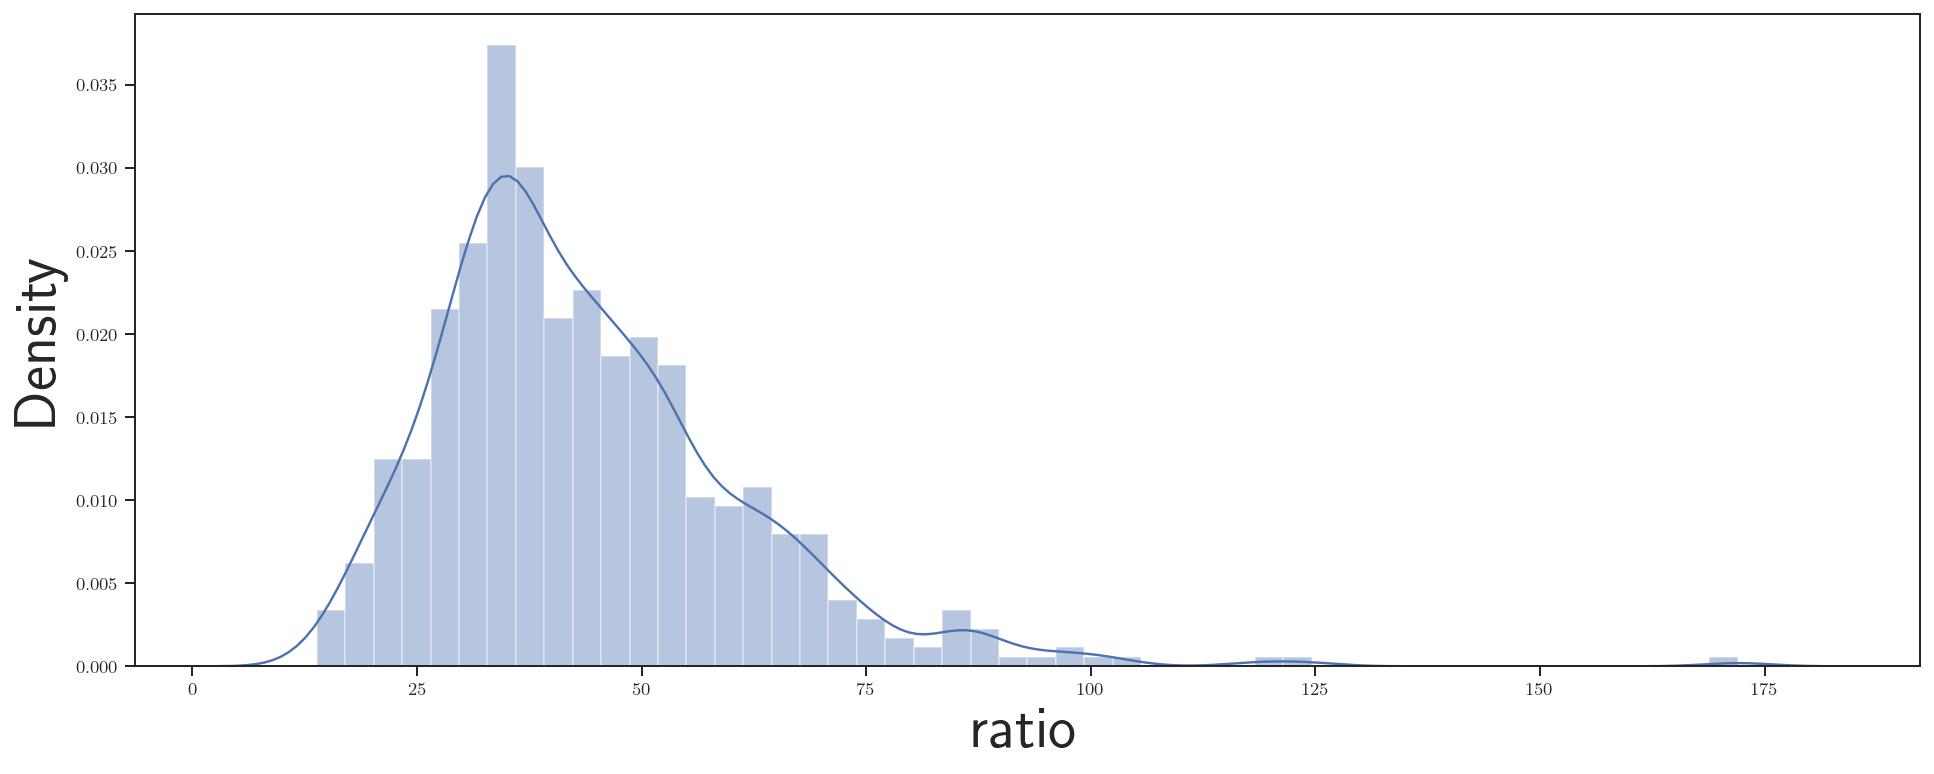

In [43]:
plt.figure(figsize=(16, 6))
sns.distplot(tmp_df["ratio"])

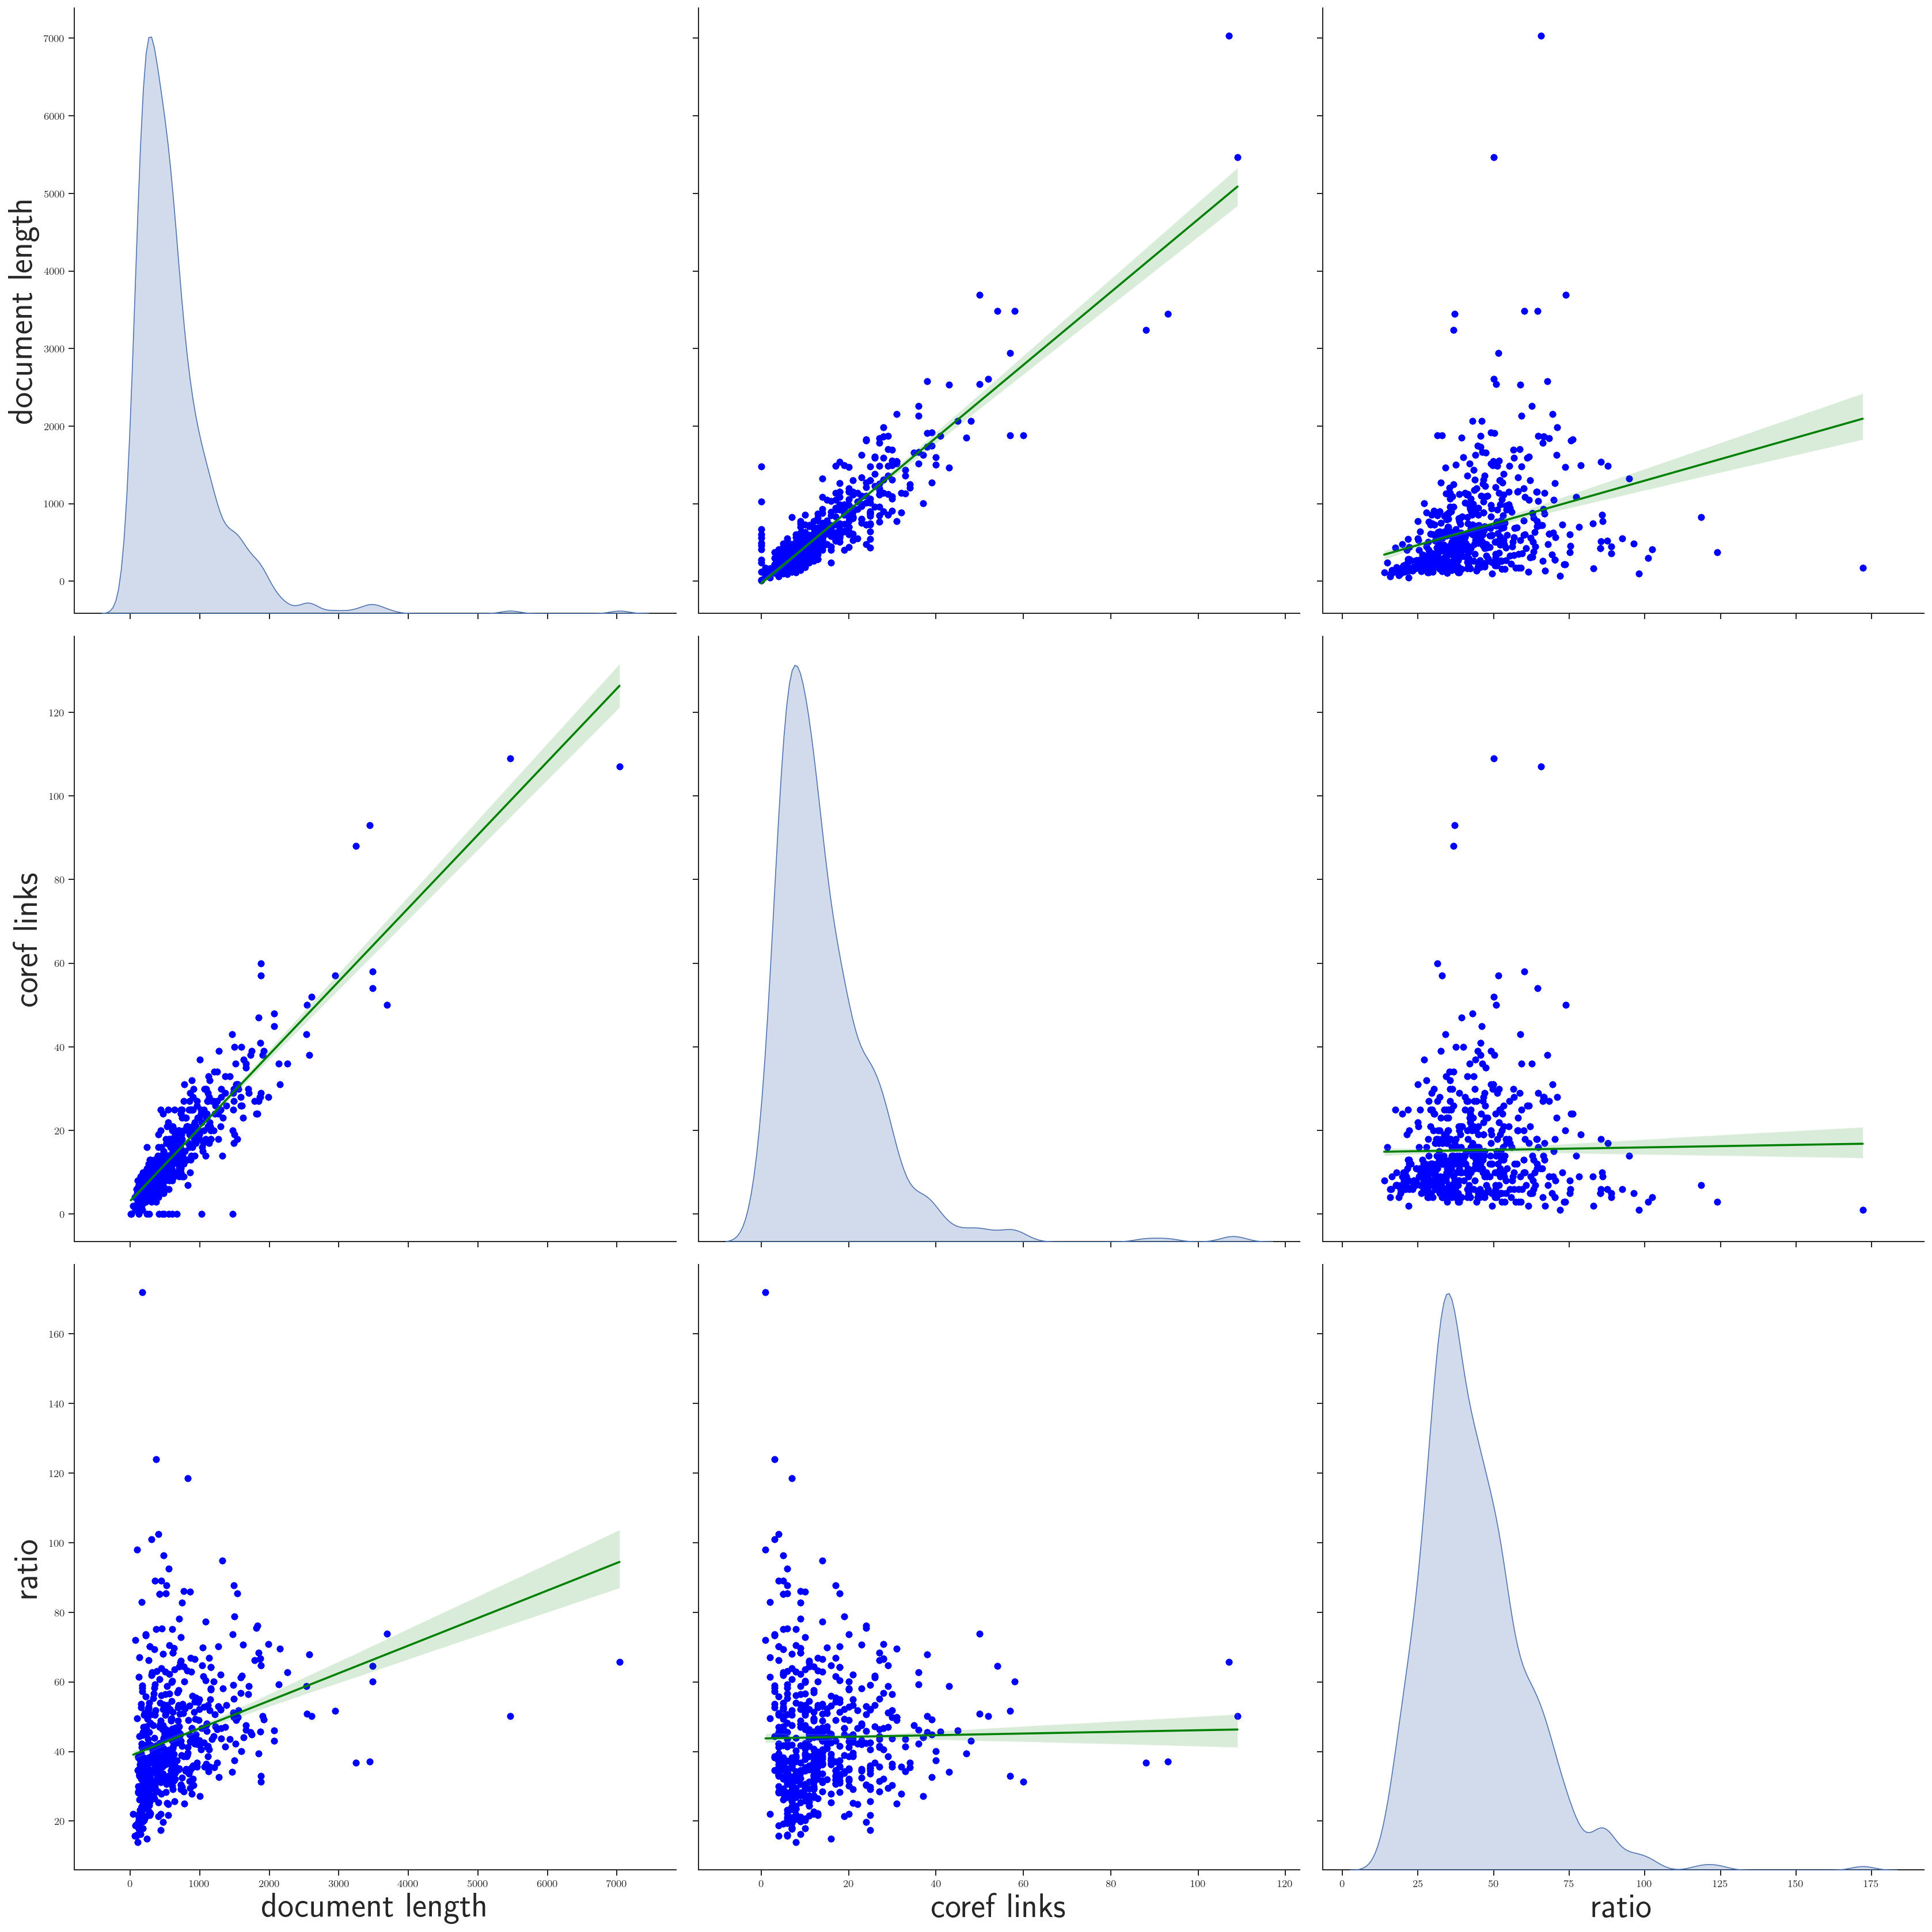

In [44]:
fit = sns.pairplot(data=tmp_df, height=8, kind="reg", diag_kind="kde", plot_kws=kws)